In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = ['vtec', 'vtec_dt_lag_3', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
tempo  = ['state_day', 'state_night', 'state_dawn']
mdv1 = ['vm1', 'vd1']
mdv2 = ['vm2', 'vd2']
lag = ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20']

original = MySet('original', ['vtec', 'vtec_dt_lag_3', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt_lag_3 = MySet('vtec_dt_lag_3', ['vtec_dt_lag_3'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt_lag_3,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt_lag_3+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

original
Error for the time series sample:
acc             0.859503
f1              0.521010
far             0.429017
fn             46.000000
fp             33.100000
kappa           0.068550
me              0.345951
mse             0.004277
pod             0.483146
precission      0.570983
re             24.079700
recall          0.483146
tn            440.900000
tp             43.000000
tse             1.551024
dtype: float64


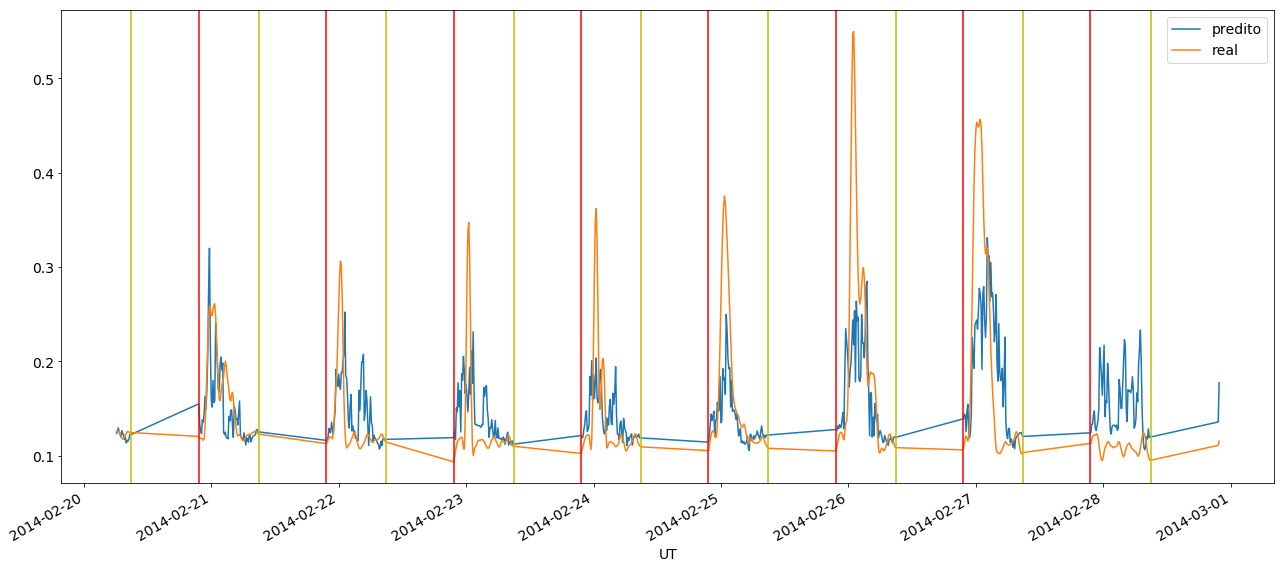


original - vtec
Error for the time series sample:
acc             0.836945
f1              0.545202
far             0.510197
fn             34.100000
fp             57.700000
kappa           0.054753
me              0.350369
mse             0.004964
pod             0.616854
precission      0.489803
re             30.789862
recall          0.616854
tn            416.300000
tp             54.900000
tse             1.670666
dtype: float64


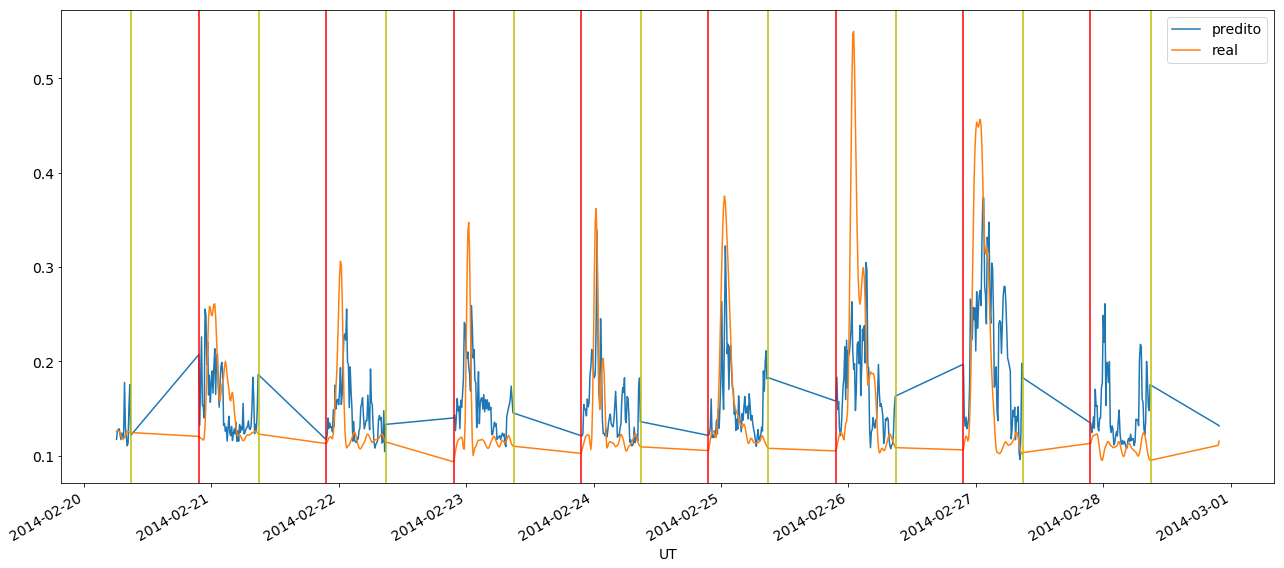


original - vtec_dt_lag_3
Error for the time series sample:
acc             0.856661
f1              0.496810
far             0.438749
fn             49.100000
fp             31.600000
kappa           0.072587
me              0.348824
mse             0.004474
pod             0.448315
precission      0.561251
re             24.153653
recall          0.448315
tn            442.400000
tp             39.900000
tse             1.586814
dtype: float64


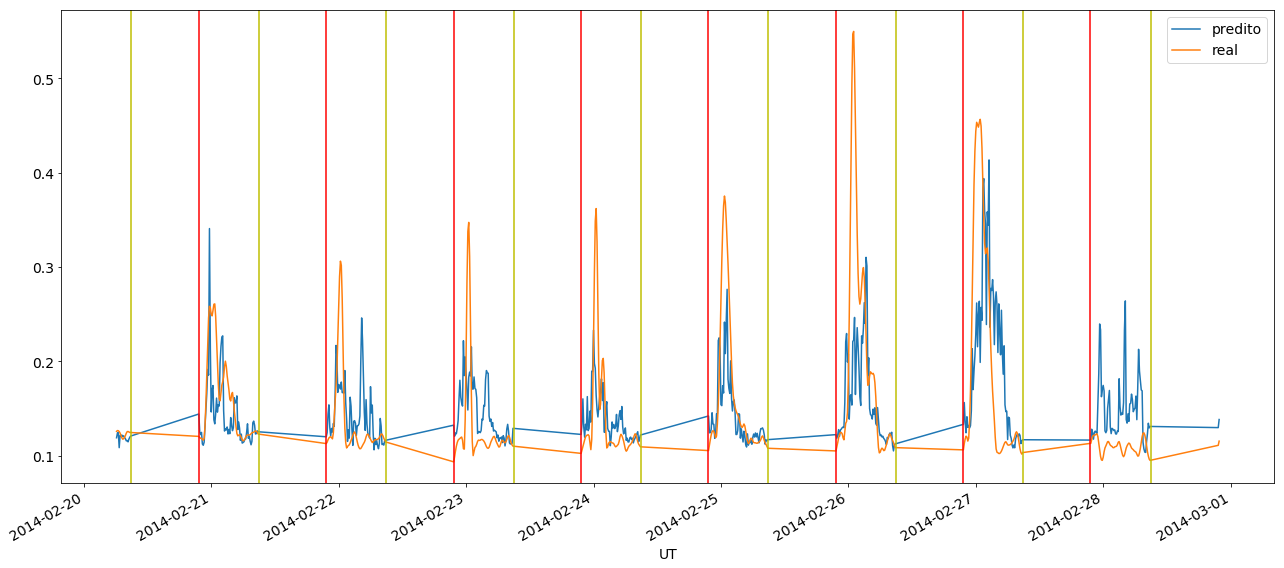


original - gvtec1
Error for the time series sample:
acc             0.865719
f1              0.524579
far             0.402746
fn             47.300000
fp             28.300000
kappa           0.070203
me              0.357939
mse             0.004330
pod             0.468539
precission      0.597254
re             24.232786
recall          0.468539
tn            445.700000
tp             41.700000
tse             1.560743
dtype: float64


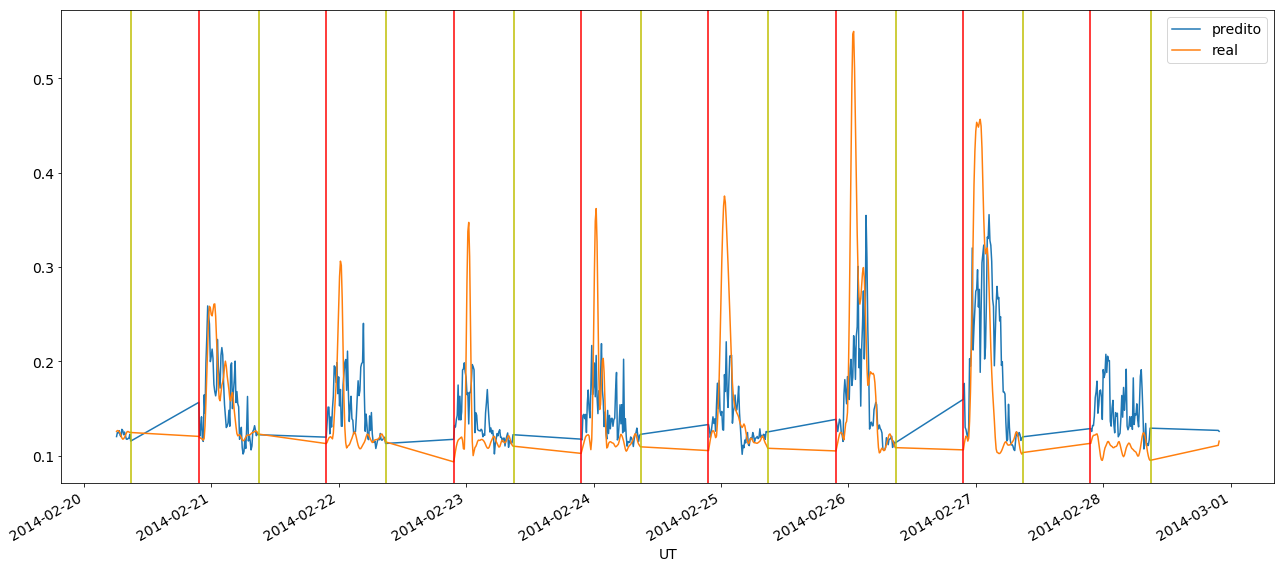


original - gvtec1_dt
Error for the time series sample:
acc             0.864831
f1              0.525839
far             0.405664
fn             46.700000
fp             29.400000
kappa           0.069538
me              0.370205
mse             0.004330
pod             0.475281
precission      0.594336
re             23.063869
recall          0.475281
tn            444.600000
tp             42.300000
tse             1.561194
dtype: float64


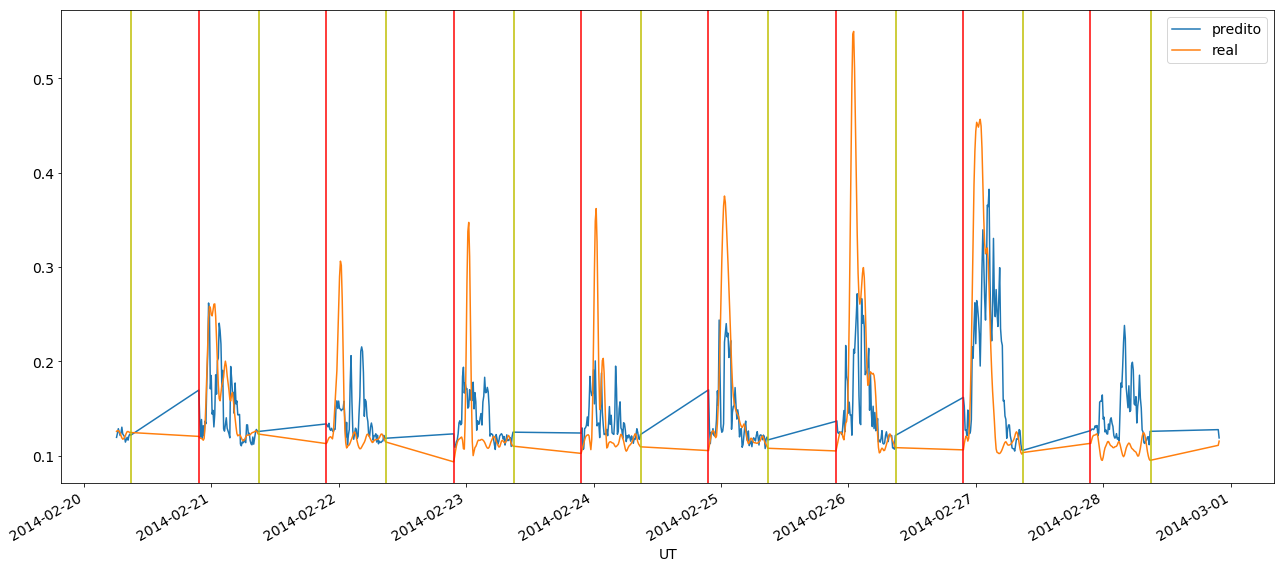


original - gvtec2
Error for the time series sample:
acc             0.800888
f1              0.479059
far             0.591446
fn             37.400000
fp             74.700000
kappa           0.059290
me              0.348268
mse             0.005386
pod             0.579775
precission      0.408554
re             31.725744
recall          0.579775
tn            399.300000
tp             51.600000
tse             1.740861
dtype: float64


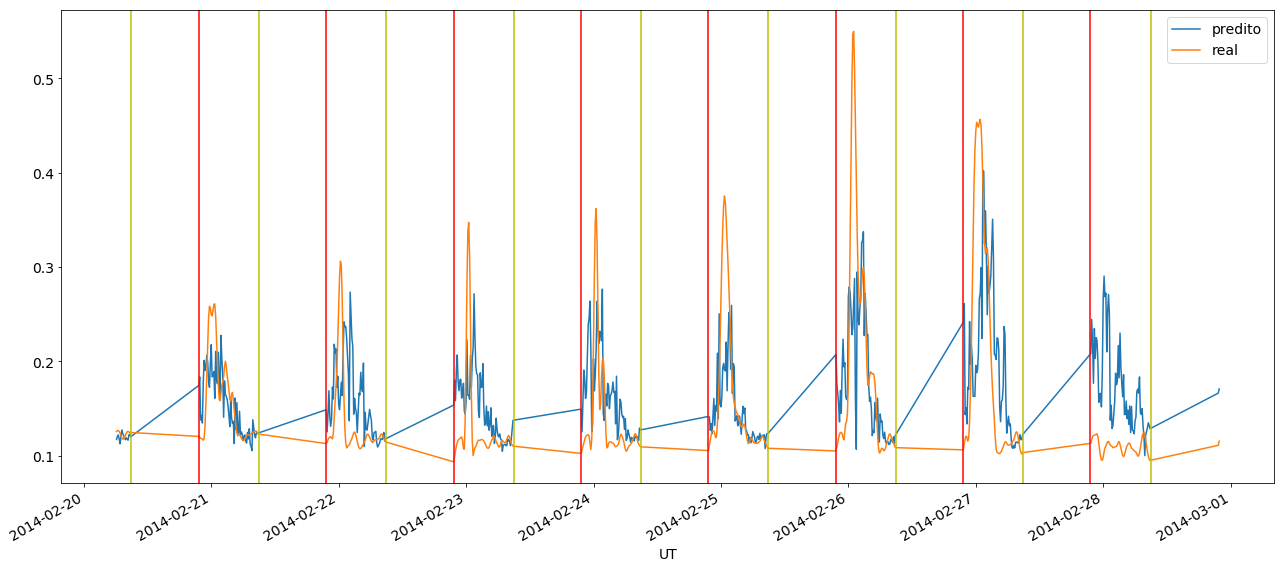


original - gvtec2_dt
Error for the time series sample:
acc             0.865364
f1              0.532935
far             0.405493
fn             45.800000
fp             30.000000
kappa           0.068295
me              0.359411
mse             0.004409
pod             0.485393
precission      0.594507
re             24.045485
recall          0.485393
tn            444.000000
tp             43.200000
tse             1.574719
dtype: float64


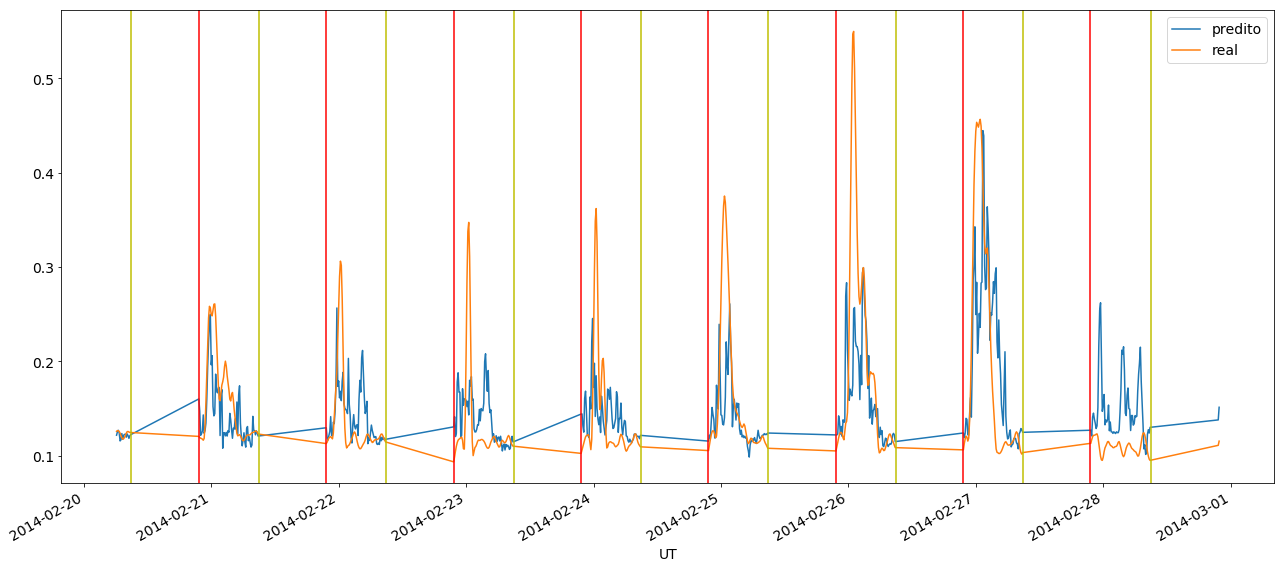


original + tempo
Error for the time series sample:
acc             0.868384
f1              0.571971
far             0.410614
fn             39.200000
fp             34.900000
kappa           0.059911
me              0.354980
mse             0.004076
pod             0.559551
precission      0.589386
re             23.540522
recall          0.559551
tn            439.100000
tp             49.800000
tse             1.514458
dtype: float64


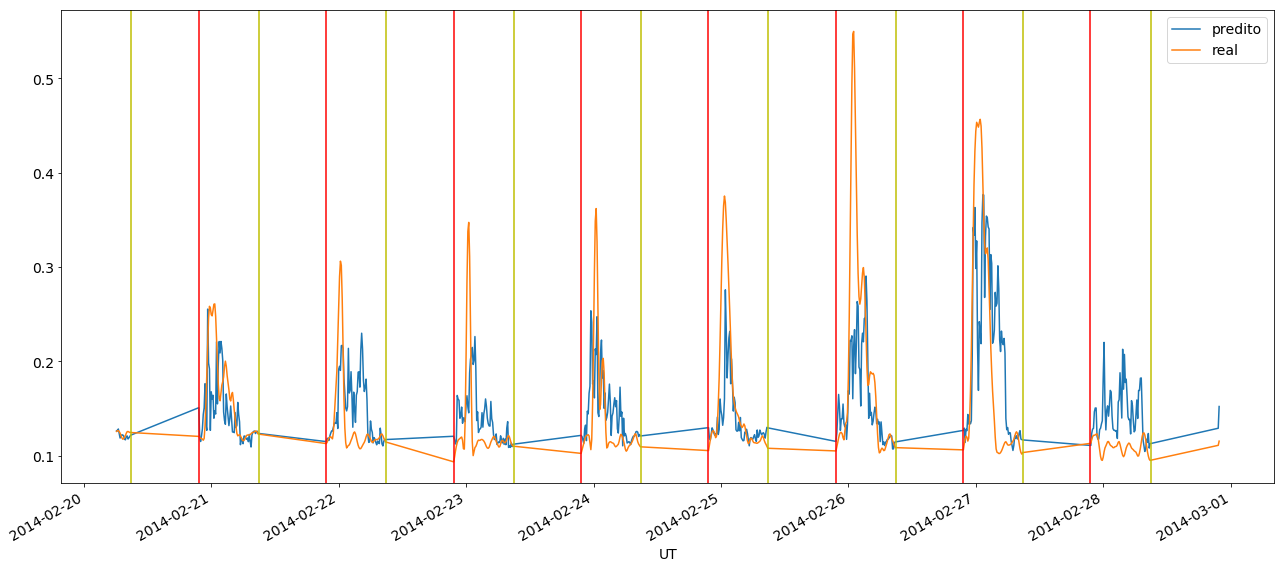


original + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.873357
f1              0.595392
far             0.396375
fn             36.500000
fp             34.800000
kappa           0.056388
me              0.330153
mse             0.004089
pod             0.589888
precission      0.603625
re             24.111053
recall          0.589888
tn            439.200000
tp             52.500000
tse             1.516745
dtype: float64


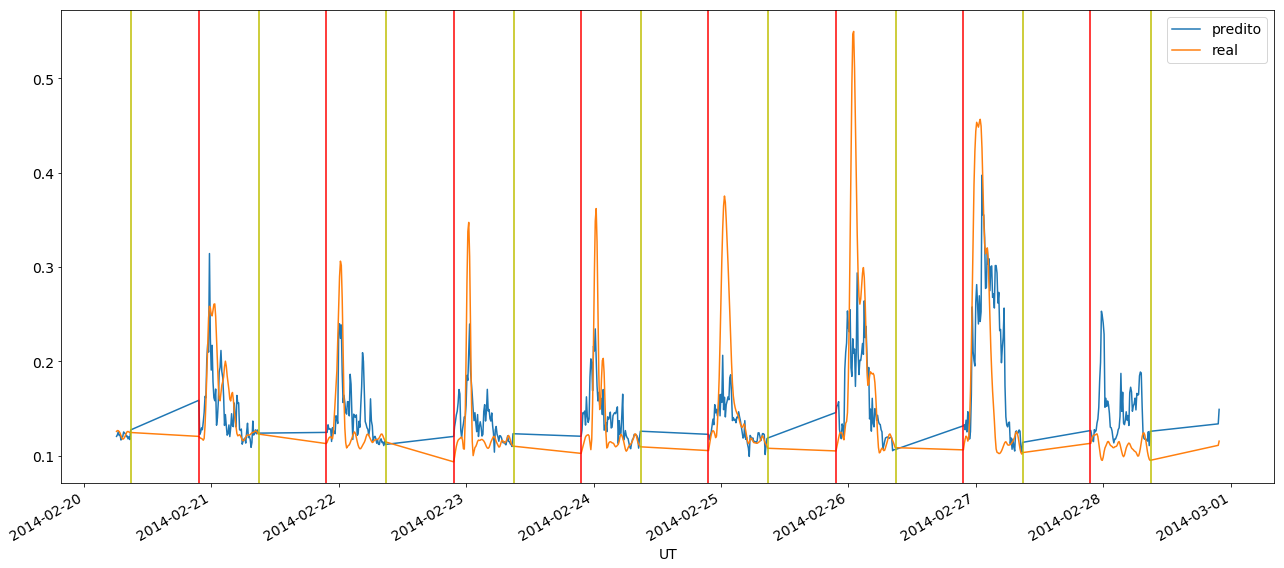


original + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.860924
f1              0.544309
far             0.432456
fn             42.100000
fp             36.200000
kappa           0.063604
me              0.347354
mse             0.004050
pod             0.526966
precission      0.567544
re             23.991637
recall          0.526966
tn            437.800000
tp             46.900000
tse             1.509578
dtype: float64


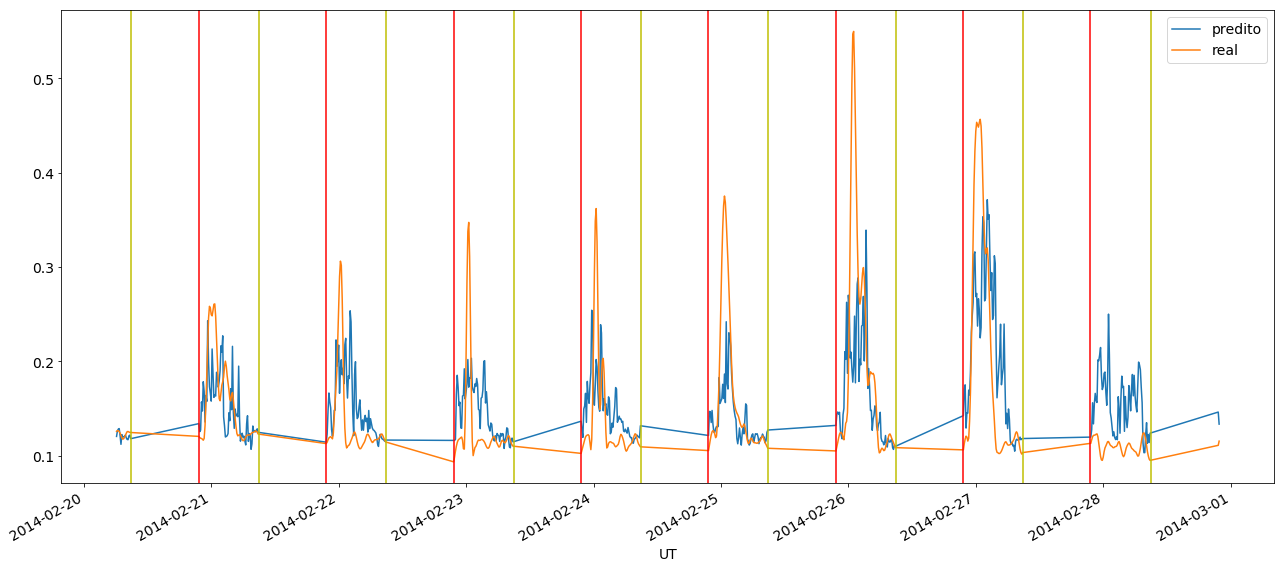


original + lag
Error for the time series sample:
acc             0.870693
f1              0.609532
far             0.414776
fn             32.100000
fp             40.700000
kappa           0.051279
me              0.335209
mse             0.004035
pod             0.639326
precission      0.585224
re             24.490144
recall          0.639326
tn            433.300000
tp             56.900000
tse             1.506500
dtype: float64


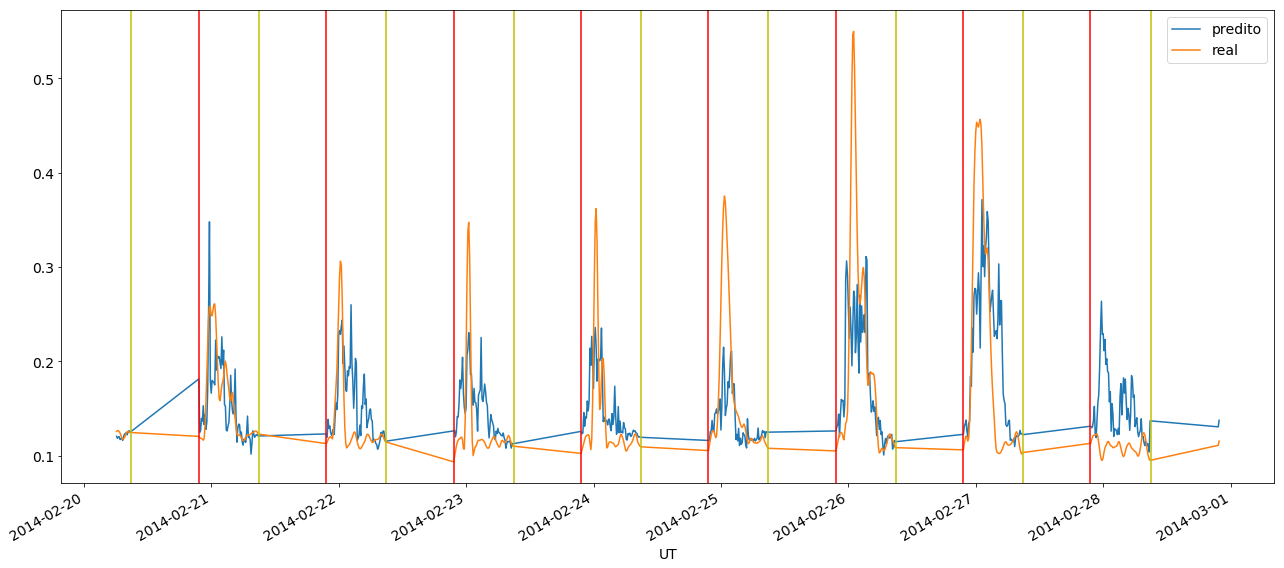


original + mdv1
Error for the time series sample:
acc             0.842096
f1              0.587114
far             0.497249
fn             25.800000
fp             63.100000
kappa           0.046075
me              0.355115
mse             0.004577
pod             0.710112
precission      0.502751
re             28.424642
recall          0.710112
tn            410.900000
tp             63.200000
tse             1.604725
dtype: float64


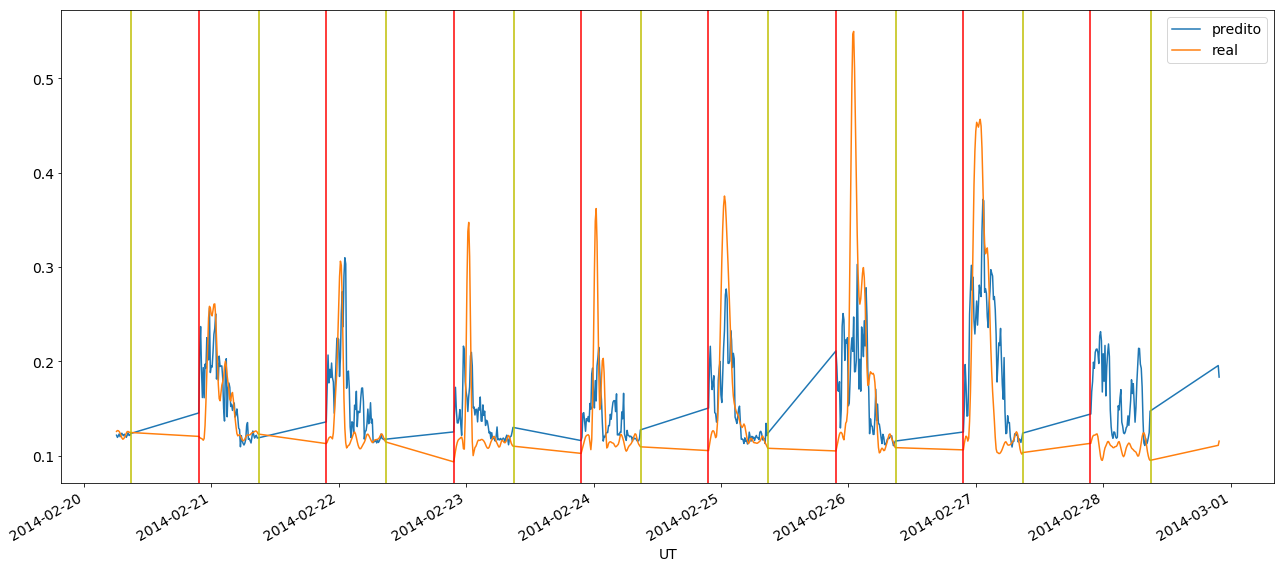


original + mdv2
Error for the time series sample:
acc             0.857904
f1              0.532865
far             0.439354
fn             43.300000
fp             36.700000
kappa           0.065130
me              0.355080
mse             0.004490
pod             0.513483
precission      0.560646
re             26.272334
recall          0.513483
tn            437.300000
tp             45.700000
tse             1.589373
dtype: float64


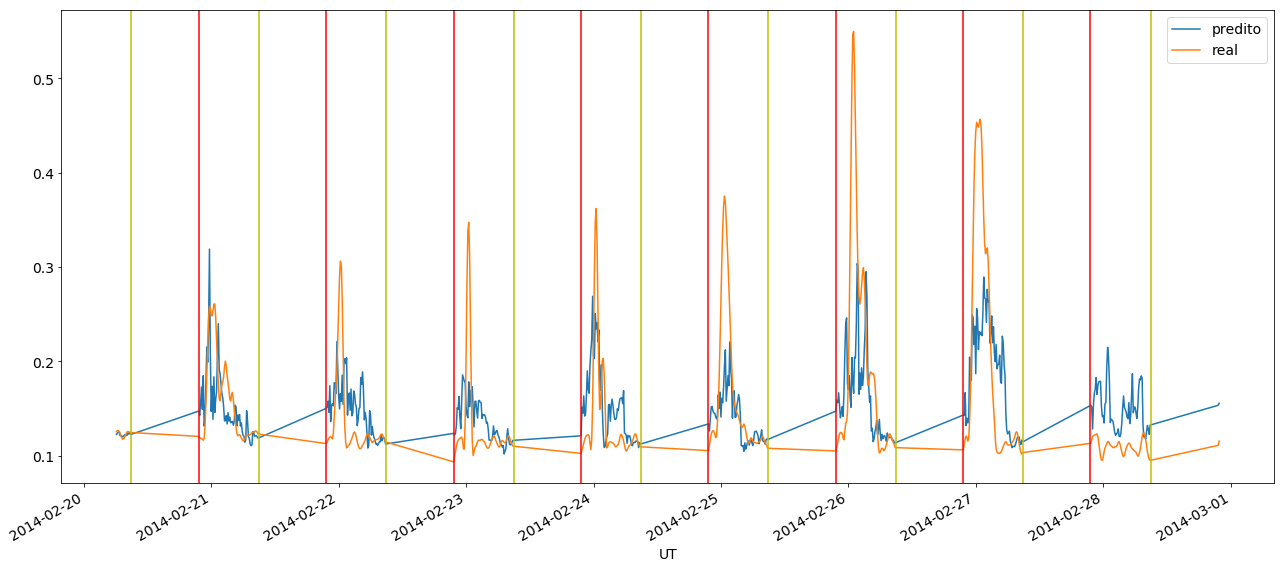


original + tempo + lag
Error for the time series sample:
acc             0.879041
f1              0.622208
far             0.383419
fn             32.800000
fp             35.300000
kappa           0.051715
me              0.363898
mse             0.003920
pod             0.631461
precission      0.616581
re             23.020747
recall          0.631461
tn            438.700000
tp             56.200000
tse             1.485234
dtype: float64


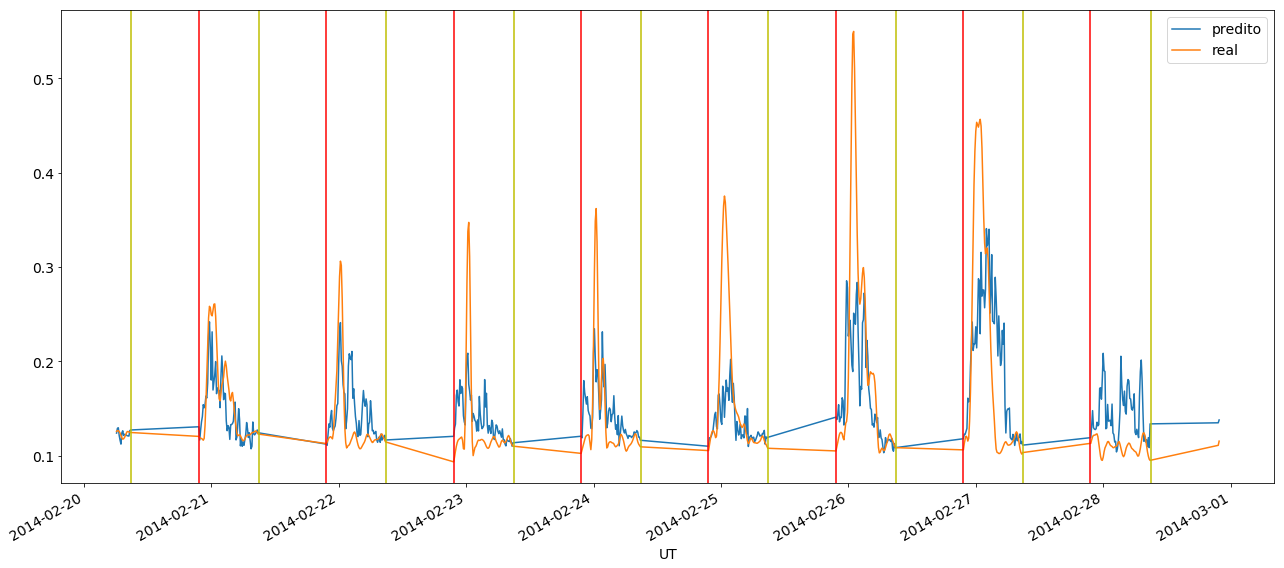


original + tempo + mdv2
Error for the time series sample:
acc             0.873712
f1              0.604598
far             0.398136
fn             34.600000
fp             36.500000
kappa           0.054100
me              0.348892
mse             0.004175
pod             0.611236
precission      0.601864
re             25.368608
recall          0.611236
tn            437.500000
tp             54.400000
tse             1.532500
dtype: float64


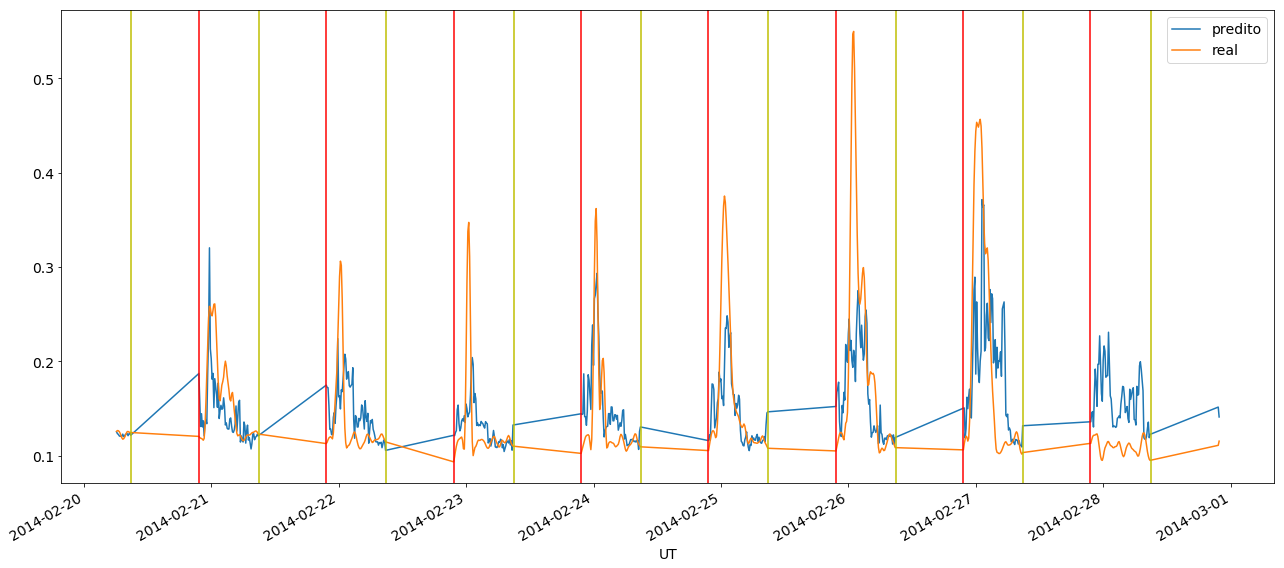


original + tempo + mdv2 + lag
Error for the time series sample:
acc             0.865542
f1              0.607804
far             0.434654
fn             30.300000
fp             45.400000
kappa           0.049444
me              0.330317
mse             0.004035
pod             0.659551
precission      0.565346
re             24.746882
recall          0.659551
tn            428.600000
tp             58.700000
tse             1.507040
dtype: float64


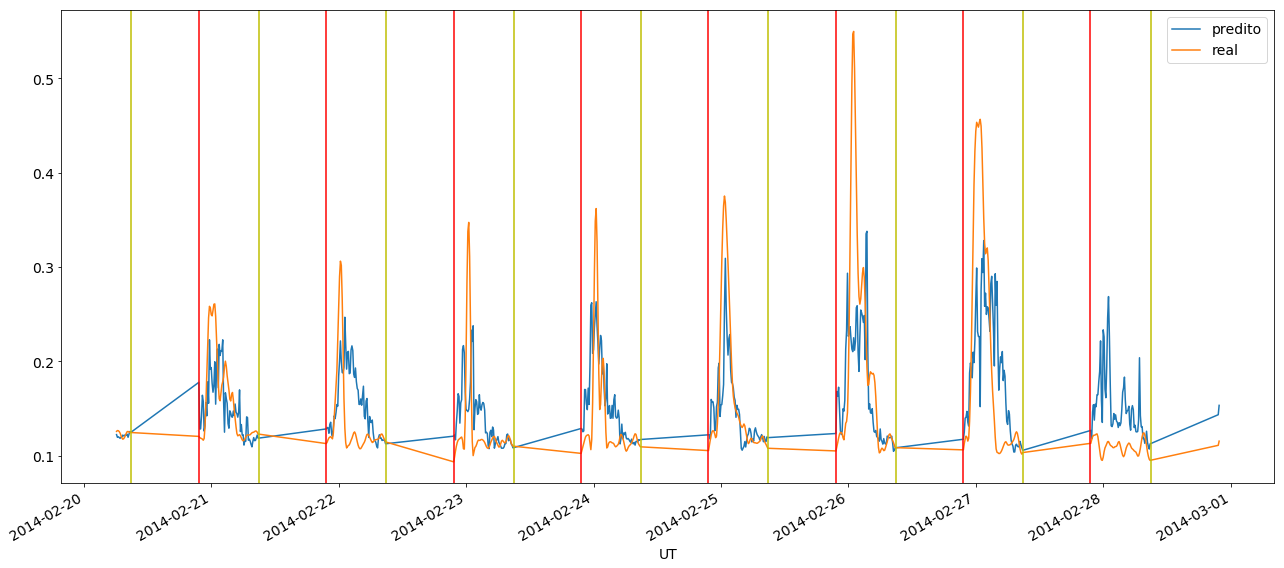


original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.858437
f1              0.630892
far             0.462294
fn             20.900000
fp             58.800000
kappa           0.039982
me              0.324480
mse             0.004212
pod             0.765169
precission      0.537706
re             28.073550
recall          0.765169
tn            415.200000
tp             68.100000
tse             1.539602
dtype: float64


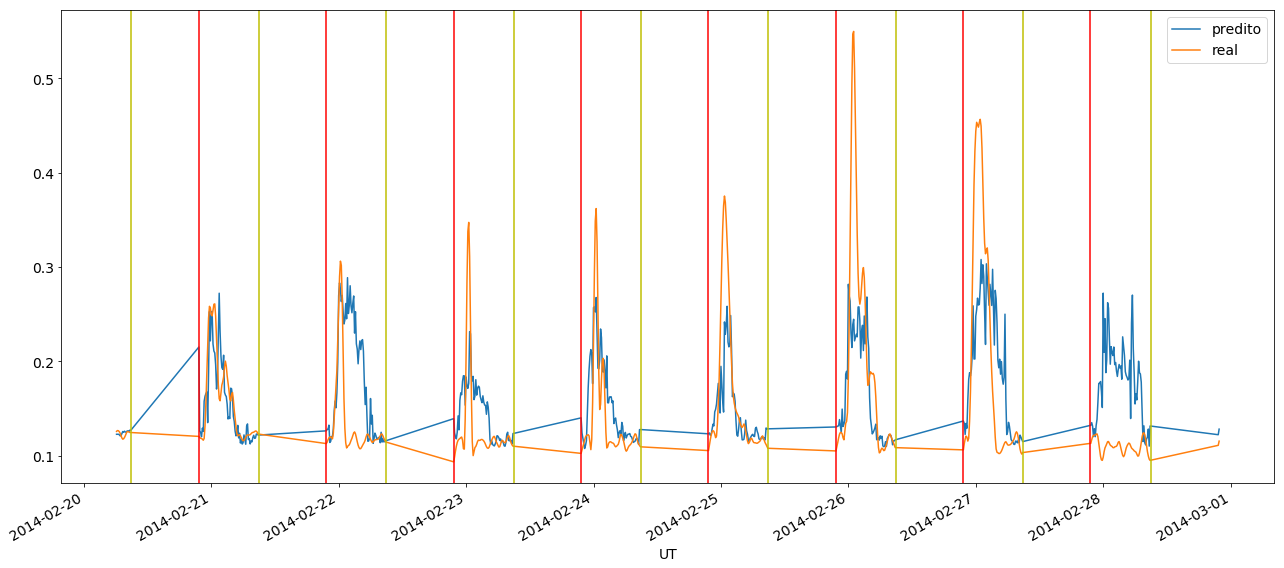


vtec
Error for the time series sample:
acc             0.785080
f1              0.265116
far             0.711778
fn             67.100000
fp             53.900000
kappa           0.092688
me              0.398694
mse             0.006999
pod             0.246067
precission      0.288222
re             29.954271
recall          0.246067
tn            420.100000
tp             21.900000
tse             1.984880
dtype: float64


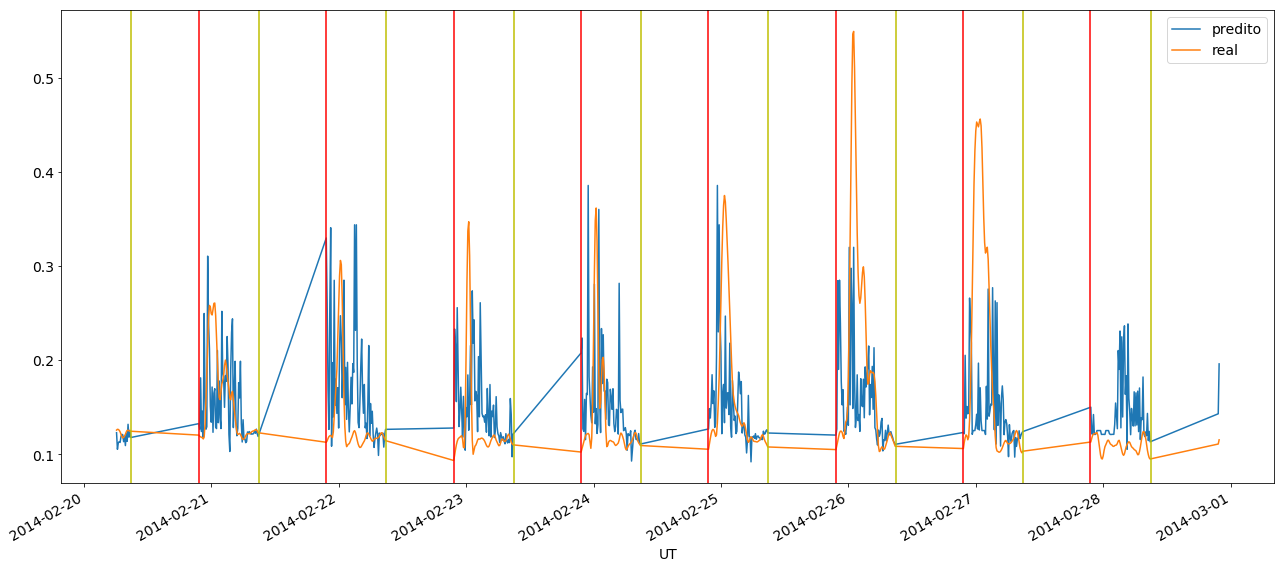


vtec + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.804263
f1              0.490892
far             0.583468
fn             35.700000
fp             74.500000
kappa           0.057587
me              0.337859
mse             0.006130
pod             0.598876
precission      0.416532
re             35.124921
recall          0.598876
tn            399.500000
tp             53.300000
tse             1.857348
dtype: float64


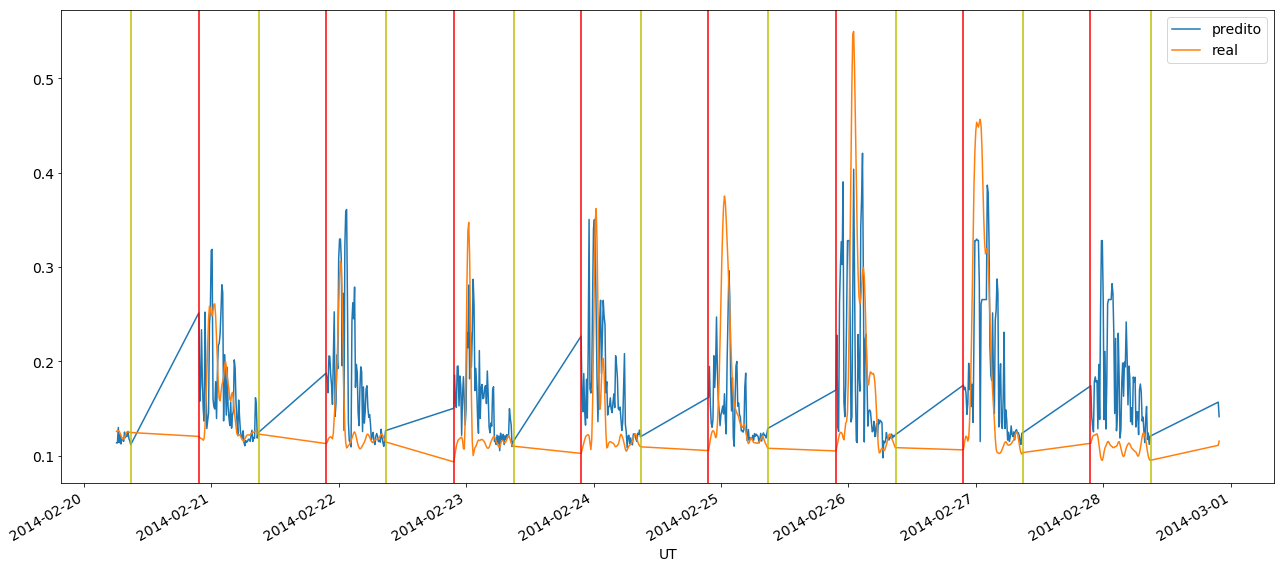


vtec + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.825755
f1              0.467747
far             0.547421
fn             45.900000
fp             52.200000
kappa           0.068166
me              0.332445
mse             0.004577
pod             0.484270
precission      0.452579
re             27.063323
recall          0.484270
tn            421.800000
tp             43.100000
tse             1.605045
dtype: float64


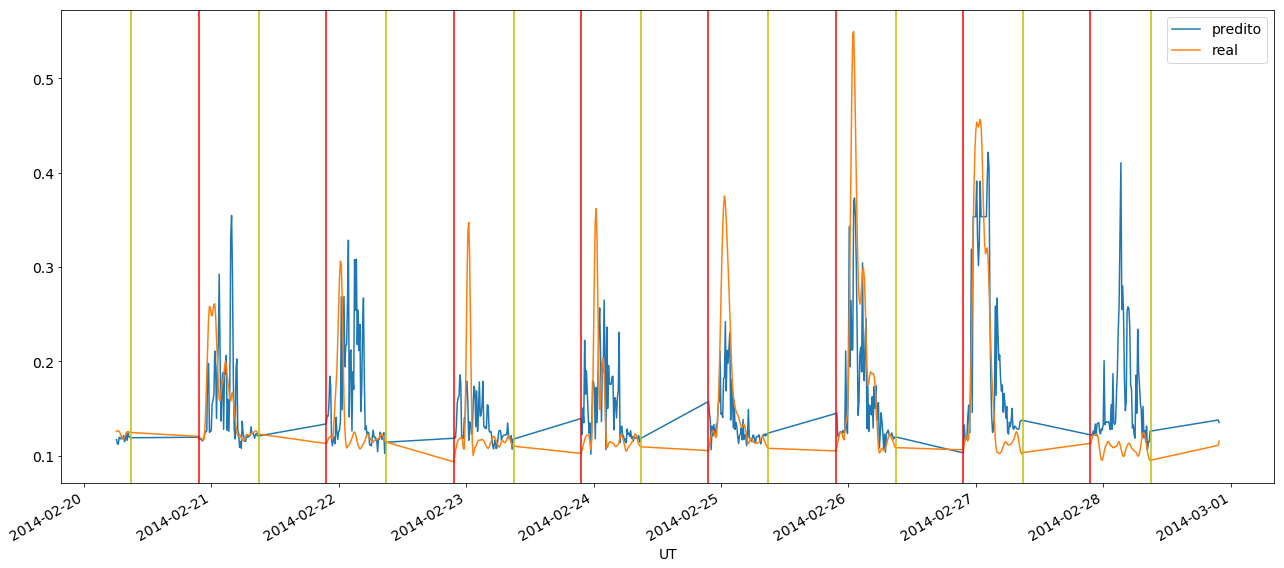


vtec + vtec_dt_lag_3 + vtec_dt2
Error for the time series sample:
acc             0.814742
f1              0.512604
far             0.561026
fn             34.100000
fp             70.200000
kappa           0.055623
me              0.335487
mse             0.006063
pod             0.616854
precission      0.438974
re             32.885039
recall          0.616854
tn            403.800000
tp             54.900000
tse             1.846959
dtype: float64


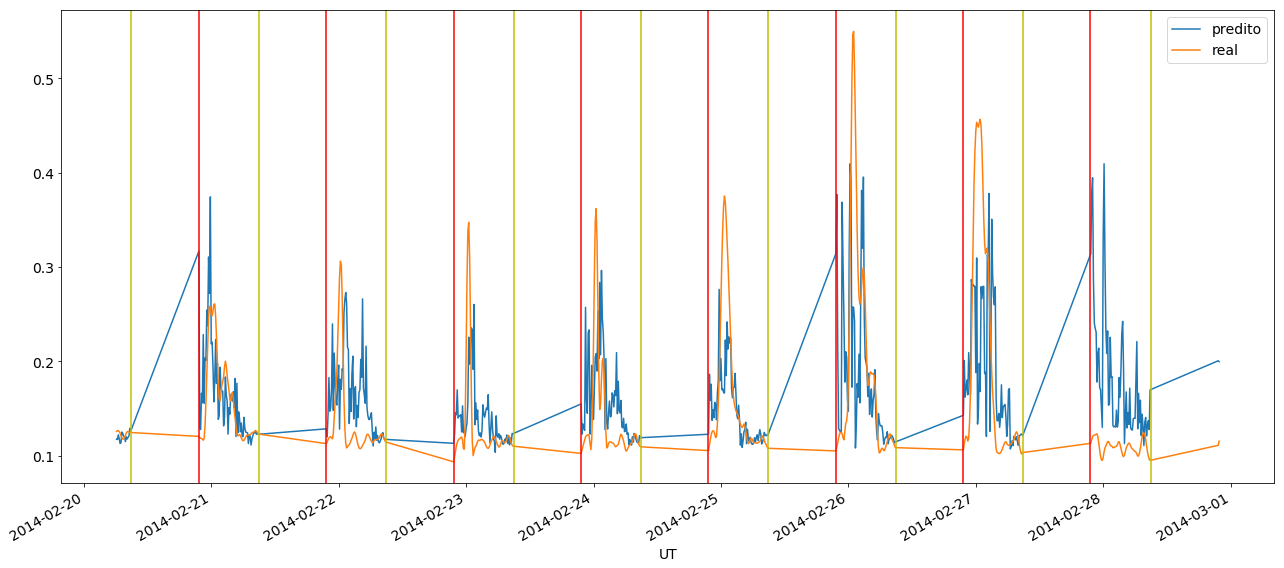


vtec + gvtec1 + gvtec2
Error for the time series sample:
acc             0.836057
f1              0.369126
far             0.526307
fn             62.000000
fp             30.300000
kappa           0.089369
me              0.378053
mse             0.005484
pod             0.303371
precission      0.473693
re             24.012796
recall          0.303371
tn            443.700000
tp             27.000000
tse             1.756820
dtype: float64


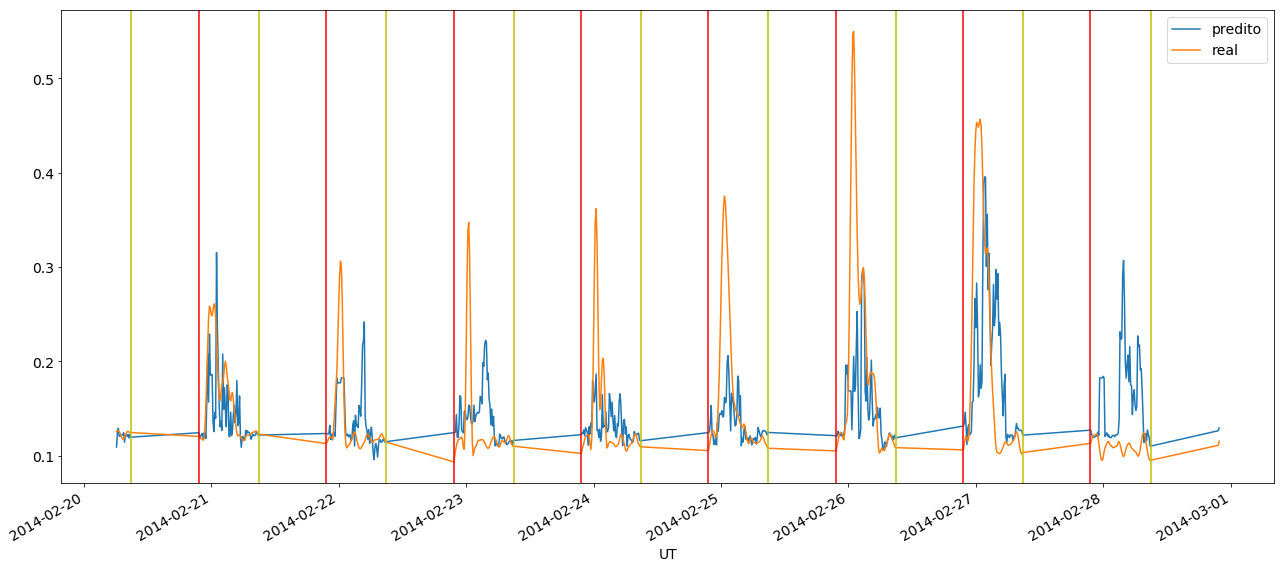


vtec + tempo
Error for the time series sample:
acc             0.782771
f1              0.389499
far             0.649804
fn             49.900000
fp             72.400000
kappa           0.072197
me              0.361301
mse             0.006856
pod             0.439326
precission      0.350196
re             32.374596
recall          0.439326
tn            401.600000
tp             39.100000
tse             1.964479
dtype: float64


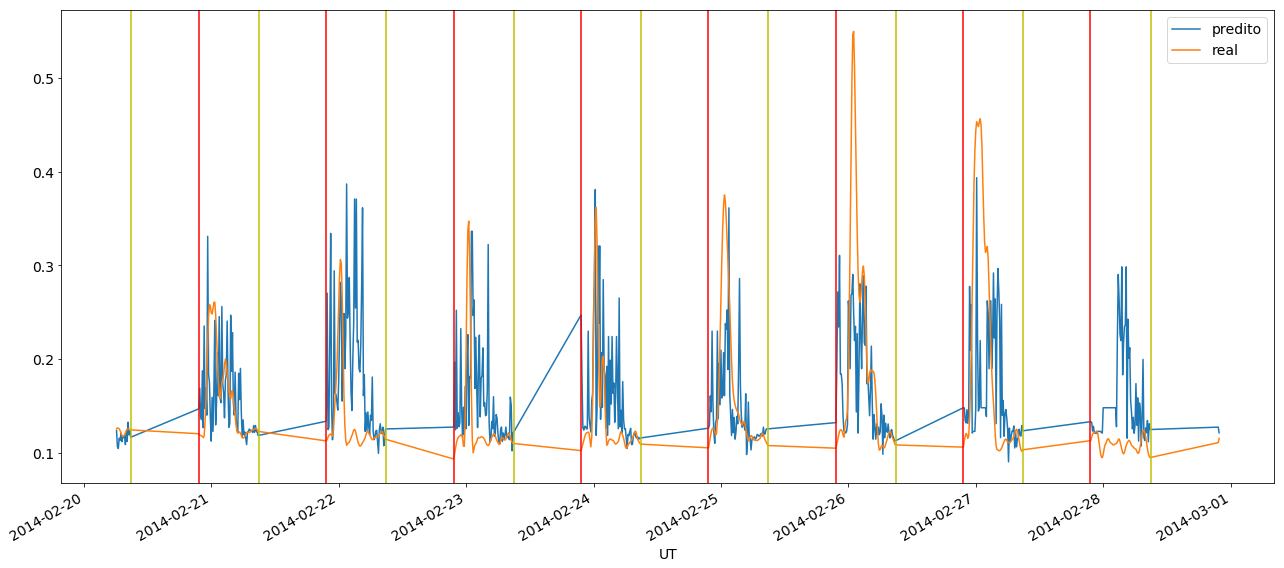


vtec + tempo + mdv1
Error for the time series sample:
acc             0.783659
f1              0.468169
far             0.616838
fn             35.100000
fp             86.700000
kappa           0.057892
me              0.308183
mse             0.008943
pod             0.605618
precission      0.383162
re             40.187338
recall          0.605618
tn            387.300000
tp             53.900000
tse             2.239900
dtype: float64


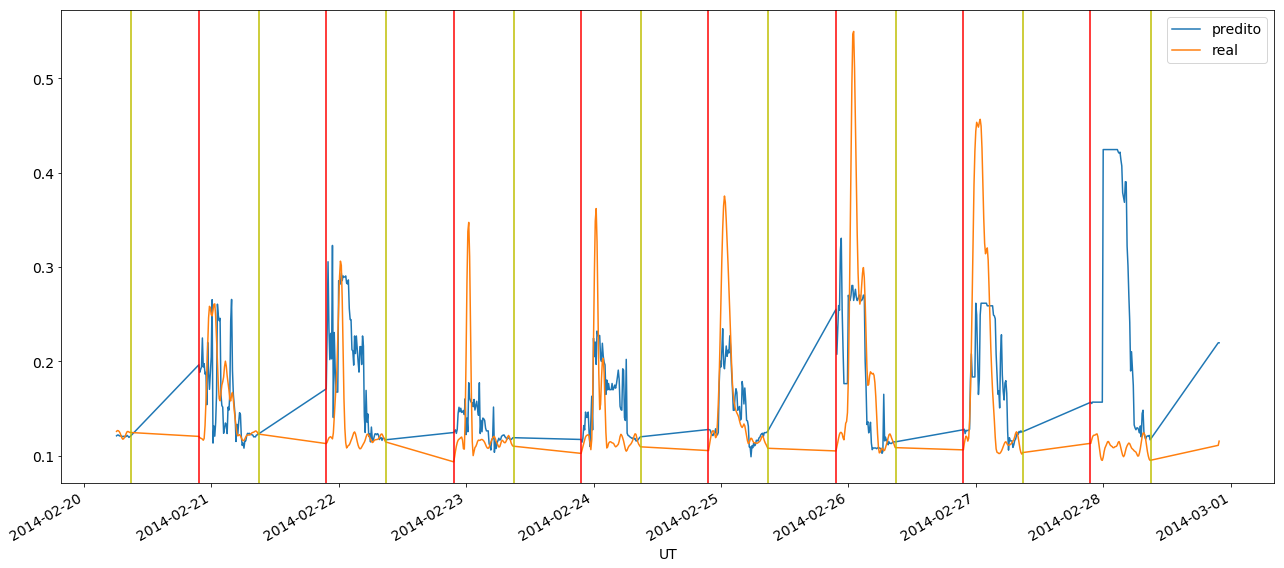


vtec + tempo + lag
Error for the time series sample:
acc             0.821137
f1              0.529503
far             0.545772
fn             32.400000
fp             68.300000
kappa           0.053627
me              0.311126
mse             0.004694
pod             0.635955
precission      0.454228
re             28.922192
recall          0.635955
tn            405.700000
tp             56.600000
tse             1.624417
dtype: float64


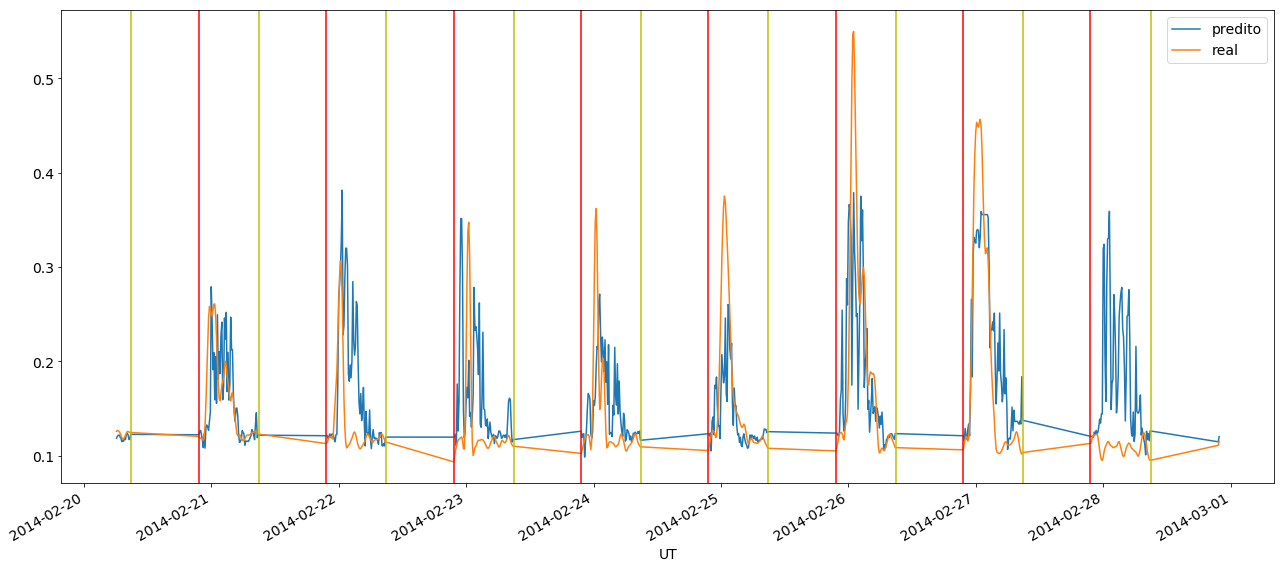


vtec + tempo + lag + mdv1
Error for the time series sample:
acc             0.800355
f1              0.548346
far             0.572852
fn             20.800000
fp             91.600000
kappa           0.044773
me              0.314429
mse             0.007235
pod             0.766292
precission      0.427148
re             35.923860
recall          0.766292
tn            382.400000
tp             68.200000
tse             2.015906
dtype: float64


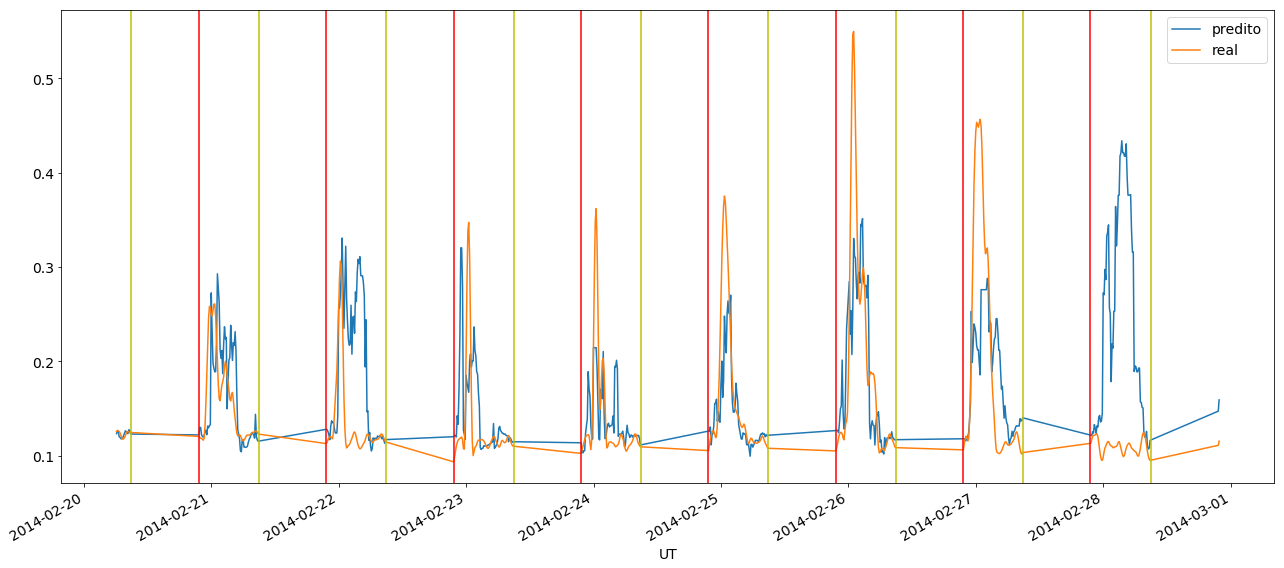


vtec + tempo + lag + mdv2
Error for the time series sample:
acc             0.796448
f1              0.453334
far             0.605995
fn             40.700000
fp             73.900000
kappa           0.063244
me              0.301408
mse             0.005137
pod             0.542697
precission      0.394005
re             30.084370
recall          0.542697
tn            400.100000
tp             48.300000
tse             1.699952
dtype: float64


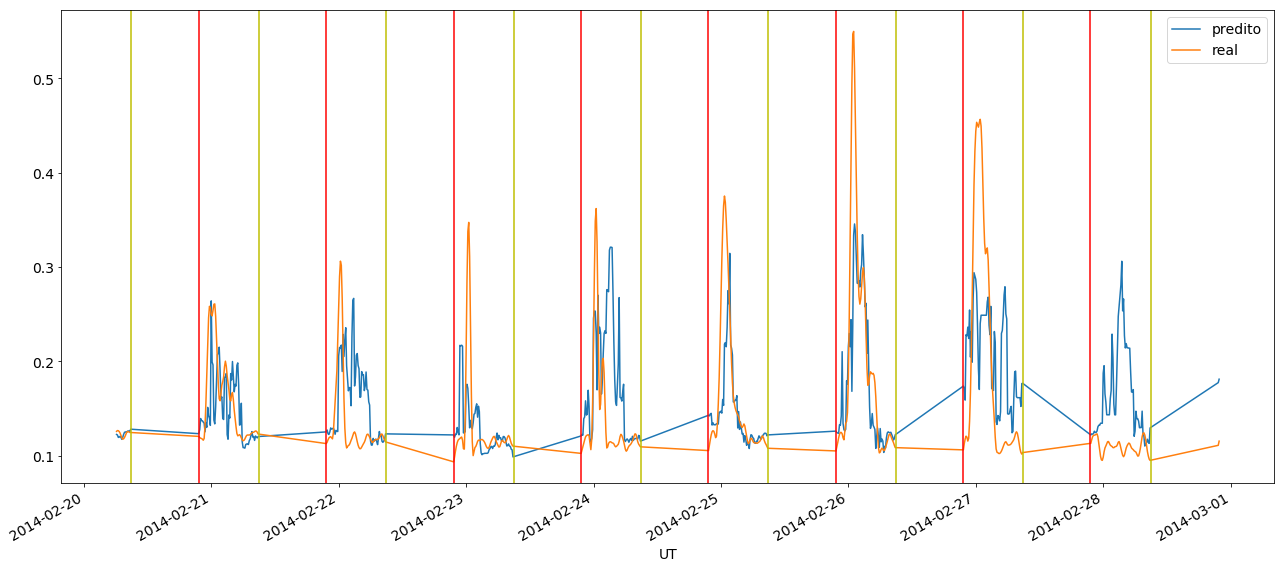


vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.773357
f1              0.497029
far             0.616648
fn             26.000000
fp            101.600000
kappa           0.050795
me              0.309642
mse             0.007211
pod             0.707865
precission      0.383352
re             37.890948
recall          0.707865
tn            372.400000
tp             63.000000
tse             2.011110
dtype: float64


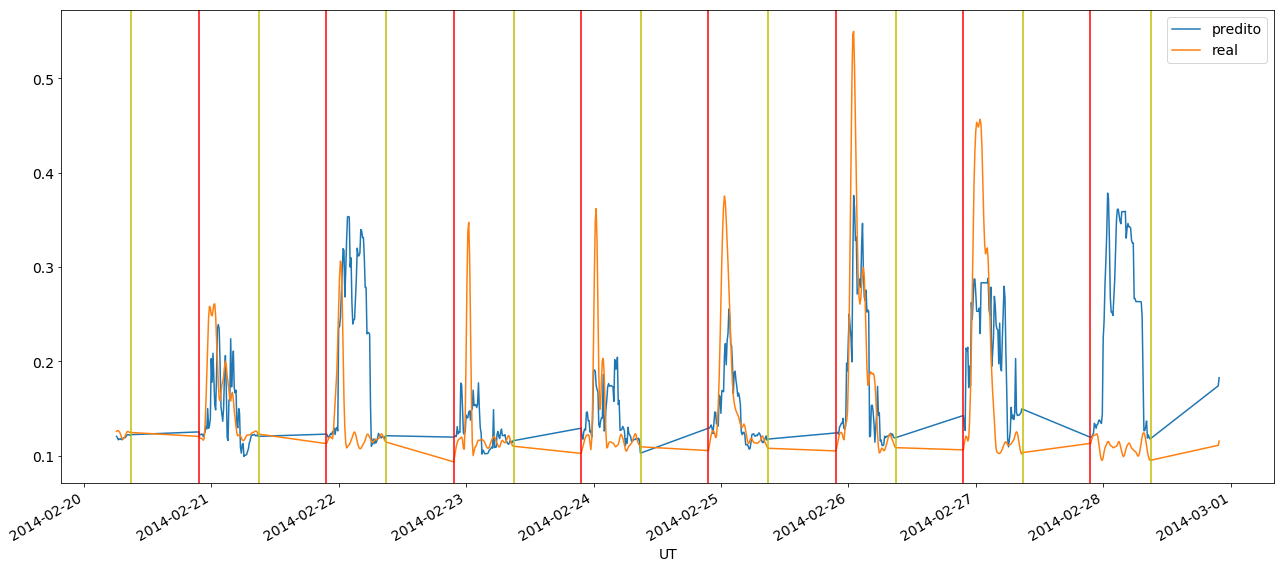

In [6]:
errors = []
for i in set_tests:
    print(i.name)
    dict_error = generate_and_avaliate_model(df=df,
                                            instances_set=list(i.set),
                                            target='s4',
                                            save=True,
                                            file_to_save_model='./images/09_analise_all_new_vtec_dt/' + i.name + '.eps ',
                                            cut_value=0.5)
    dict_error['name'] = i.name
    errors.append(dict_error)
    print()

In [7]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [8]:
df

,tp,tn,fp,fn,re,pod,far,acc,precission,recall,f1,kappa,me,tse,mse
name,,,,,,,,,,,,,,,
original,43.0,440.9,33.1,46.0,24.0797,0.4831,0.4290,0.8595,0.5710,0.4831,0.5210,0.0686,0.3460,1.5510,0.0043
original - vtec,54.9,416.3,57.7,34.1,30.7899,0.6169,0.5102,0.8369,0.4898,0.6169,0.5452,0.0548,0.3504,1.6707,0.0050
original - vtec_dt_lag_3,39.9,442.4,31.6,49.1,24.1537,0.4483,0.4387,0.8567,0.5613,0.4483,0.4968,0.0726,0.3488,1.5868,0.0045
original - gvtec1,41.7,445.7,28.3,47.3,24.2328,0.4685,0.4027,0.8657,0.5973,0.4685,0.5246,0.0702,0.3579,1.5607,0.0043
original - gvtec1_dt,42.3,444.6,29.4,46.7,23.0639,0.4753,0.4057,0.8648,0.5943,0.4753,0.5258,0.0695,0.3702,1.5612,0.0043
original - gvtec2,51.6,399.3,74.7,37.4,31.7257,0.5798,0.5914,0.8009,0.4086,0.5798,0.4791,0.0593,0.3483,1.7409,0.0054
original - gvtec2_dt,43.2,444.0,30.0,45.8,24.0455,0.4854,0.4055,0.8654,0.5945,0.4854,0.5329,0.0683,0.3594,1.5747,0.0044
original + tempo,49.8,439.1,34.9,39.2,23.5405,0.5596,0.4106,0.8684,0.5894,0.5596,0.5720,0.0599,0.3550,1.5145,0.0041
original + gvtec1_dt_lag_9,52.5,439.2,34.8,36.5,24.1111,0.5899,0.3964,0.8734,0.6036,0.5899,0.5954,0.0564,0.3302,1.5167,0.0041
